In [134]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [135]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [136]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [137]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [138]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [139]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [140]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [141]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.


('2017-08-23')

In [142]:
# Inspect the columns in the Measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(f"Name: {column['name']} Type {column['type']}")

Name: id Type INTEGER
Name: station Type TEXT
Name: date Type TEXT
Name: prcp Type FLOAT
Name: tobs Type FLOAT


In [143]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


Text(0, 0.5, 'Inches')

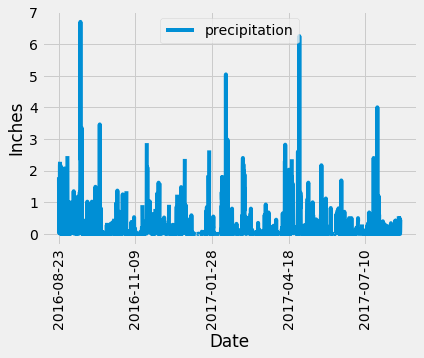

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [144]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
#most_recent_date = dt.datetime.strptime(most_recent_date, '%y-%m-%d')
query_dt = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precep_data = session.query(Measurement.prcp, Measurement.date).\
                filter(Measurement.date > query_dt).\
                order_by(Measurement.date.desc())


# Save the query results as a Pandas DataFrame and set the index to the date column
precep_df = pd.DataFrame(precep_data)
precep_df.set_index('date', inplace=True)


# Sort the dataframe by date
precep_df.sort_index(ascending=False, inplace = True)
precep_df.head()

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


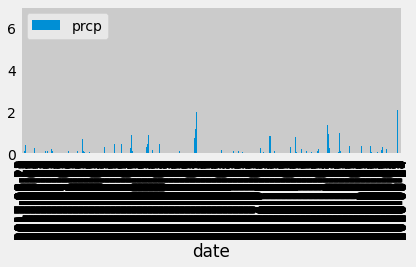

In [200]:
# Use Pandas Plotting with Matplotlib to plot the data
precep_df.plot.bar()
plt.tight_layout()

plt.show()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [146]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precep_data_all = session.query(Measurement.prcp)
precep_all_df  = pd.DataFrame(precep_data_all)

precep_all_df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset


[(9)]

In [147]:
#Inspect the columns in the station table
station_columns  = inspector.get_columns('station')
for column in station_columns:
     print(f"Name: {column['name']} Type {column['type']}")
    

Name: id Type INTEGER
Name: station Type TEXT
Name: name Type TEXT
Name: latitude Type FLOAT
Name: longitude Type FLOAT
Name: elevation Type FLOAT


In [ ]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).count()
print(station_count)

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [158]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count_ = func.count('*').label('count_rec')
active_stations = session.query(count_, Measurement.station).\
        filter(Measurement.station == Station.station).\
        group_by(Measurement.station).order_by(count_.desc())

for row in active_stations:
    print(row.station, row.count_rec)


USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

In [164]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
temperature_stats = session.query(*sel).filter(Measurement.station == 'USC00519281').all()
print(temperature_stats)



[(54.0, 85.0, 71.66378066378067)]


Text(0.5, -1.340000000000014, 'Temperature')

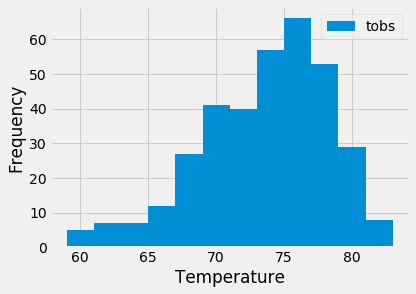

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


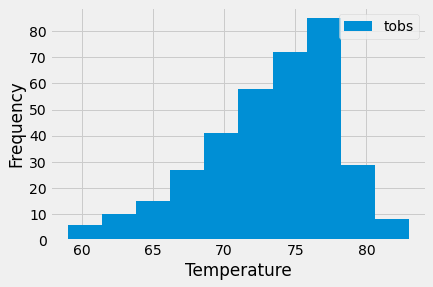

In [199]:
temperature_data = session.query(Measurement.tobs).\
                    filter(Measurement.station == 'USC00519281').\
                    filter(Measurement.date > query_dt)
temperature_df = pd.DataFrame(temperature_data)
temperature_df.plot.hist()

#set the frequency of y-ticks
y_ticks = np.arange(0,90,10)
plt.yticks(y_ticks)
plt.legend(loc='upper right')
plt.xlabel('Temperature')
plt.show()

# Close Session

In [192]:
session.close()